In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

from time import time

### GaussianMix

In [2]:
pi = torch.tensor([[0.33,], [0.66]])    # weights are tensors (c, 1) where c is the number of components
mu = torch.tensor([[-1., 0.], [1., -1]])  # means are tensors (c, d) where c is the number of components and d is the number of dimensions
sigma = torch.tensor([[[0.25, 0.], [0., 0.25]],
                      [[0.25, 0.], [0.,0.25]]]) # covariances are tensors (c, d, d)

gmm = GaussianMix(pi, mu, sigma)

print('Number of components:', gmm.n_comp())
print('Number of dimensions:', gmm.n_dim())
print('Mean:', gmm.mean())
print('Covariance:', gmm.cov())

Number of components: 2
Number of dimensions: 2
Mean: tensor([ 0.3300, -0.6600])
Covariance: tensor([[ 1.1275, -0.4400],
        [-0.4400,  0.4675]])


Text(0.5, 1.0, 'Marginal pdf')

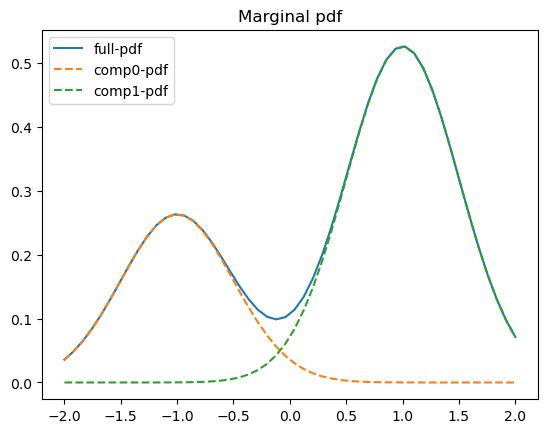

In [3]:
import matplotlib.pyplot as plt

x = torch.linspace(-2, 2, 50).reshape((50,1))
y = gmm.marg_pdf(x.unsqueeze(0), [0])
plt.plot(x, y.flatten(), label='full-pdf')
plt.plot(x, gmm.pi[0]*gmm.marg_comp_pdf(x, 0, [0]), label='comp0-pdf', ls='--')
plt.plot(x, gmm.pi[1]*gmm.marg_comp_pdf(x, 1, [0]), label='comp1-pdf', ls='--')
plt.legend()
plt.title('Marginal pdf')

## Distributions

In [4]:
new_dist = Dist(['a', 'b'], gmm)

print('Var list:', new_dist.var_list)
print('GM:', new_dist.gm)

Var list: ['a', 'b']
GM: pi: tensor([[0.3300],
        [0.6600]])
mu: tensor([[-1.,  0.],
        [ 1., -1.]])
sigma: tensor([[[0.2500, 0.0000],
         [0.0000, 0.2500]],

        [[0.2500, 0.0000],
         [0.0000, 0.2500]]])


## Linear operations on distributions

In [5]:
pi = torch.tensor([[0.5], [0.5]])    # weights are tensors (c, 1) where c is the number of components
mu = torch.tensor([[1.,2.], [-1., -2.]])  # means are tensors (c, d) where c is the number of components and d is the number of dimensions
sigma = torch.tensor([[[1., 0.], [0., 1.]], [[1., 0.], [0., 1.]]]) # covariances are tensors (c, d, d)

gmm = GaussianMix(pi, mu, sigma)

var_list = ['x', 'y']

dist = Dist(var_list, gmm)


expr = 'x = x + 3*y - gm([1.], [1.], [1.]) -1'
data = {}
params_dict = {}

new_dist = update_rule(dist, expr, data, params_dict)
new_dist

Dist<['x', 'y'],pi: tensor([[0.5000],
        [0.5000]])
mu: tensor([[ 5.,  2.],
        [-9., -2.]])
sigma: tensor([[[11.,  3.],
         [ 3.,  1.]],

        [[11.,  3.],
         [ 3.,  1.]]])>

## Products between variables

In [6]:
pi = torch.tensor([[0.5], [0.5]])    # weights are tensors (c, 1) where c is the number of components
mu = torch.tensor([[1.,2.], [-1., -2.]])  # means are tensors (c, d) where c is the number of components and d is the number of dimensions
sigma = torch.tensor([[[1., 0.], [0., 1.]], [[1., 0.], [0., 1.]]]) # covariances are tensors (c, d, d)

gmm = GaussianMix(pi, mu, sigma)

var_list = ['x', 'y']

dist = Dist(var_list, gmm)

expr = 'x = gm([1.], [1.], [1.])*y'
data = {}
params_dict = {}

start = time()
new_dist = update_rule(dist, expr, data, params_dict)
end = time()

print('Time:', end-start)
new_dist

Time: 0.003218412399291992


Dist<['x', 'y'],pi: tensor([[0.5000],
        [0.5000]])
mu: tensor([[ 2.,  2.],
        [-2., -2.]])
sigma: tensor([[[6., 1.],
         [1., 1.]],

        [[6., 1.],
         [1., 1.]]])>

## Truncations

In [7]:
pi = torch.tensor([[0.5], [0.5]])    # weights are tensors (c, 1) where c is the number of components
mu = torch.tensor([[1.,2.], [-1., -2.]])  # means are tensors (c, d) where c is the number of components and d is the number of dimensions
sigma = torch.tensor([[[1., 0.], [0., 1.]], [[1., 0.], [0., 1.]]]) # covariances are tensors (c, d, d)

gmm = GaussianMix(pi, mu, sigma)

var_list = ['x', 'y']

dist = Dist(var_list, gmm)

trunc = 'x - gm([1.], [1.], [1.])> 0'
data = {}
params_dict = {}

truncate(dist, trunc, data, params_dict)

(tensor(0.2893),
 Dist<['x', 'y'],pi: tensor([[0.8641],
         [0.1359]])
 mu: tensor([[ 1.5642,  2.0000],
         [ 0.3195, -2.0000]])
 sigma: tensor([[[0.6817, 0.0000],
          [0.0000, 1.0000]],
 
         [[0.5784, 0.0000],
          [0.0000, 1.0000]]])>)

## Observations

In [2]:
pi = torch.tensor([[0.5], [0.5]])    # weights are tensors (c, 1) where c is the number of components
mu = torch.tensor([[1.,2.,3.], [-1., -2.,-3]])  # means are tensors (c, d) where c is the number of components and d is the number of dimensions
sigma = torch.tensor([[[1., 0.5, 0.], [0.5, 1.,0.], [0., 0., 1.]], [[1., 0., 0.5], [0., 2., 0.5], [0.5, 0.5, 1.]]]) # covariances are tensors (c, d, d)

gmm = GaussianMix(pi, mu, sigma)

var_list = ['x', 'y', 'z']

dist = Dist(var_list, gmm)

trunc = 'x == 0'
data = {}
params_dict = {}

truncate(dist, trunc, data, params_dict)

(tensor(1.),
 Dist<['y', 'z'],pi: tensor([[0.5000],
         [0.5000]])
 mu: tensor([[ 1.5000,  3.0000],
         [-2.0000, -2.5000]])
 sigma: tensor([[[0.7500, 0.0000],
          [0.0000, 1.0000]],
 
         [[2.0000, 0.5000],
          [0.5000, 0.7500]]])>)

## Merge

In [2]:
var_list = ['x', 'y']
dist1 = Dist(var_list, GaussianMix(torch.tensor([[0.5], [0.5]]), torch.tensor([[1., 2.], [-1., -2.]]), torch.tensor([[[1., 0.], [0., 1.]], [[1., 0.], [0., 1.]]])))
dist2 = Dist(var_list, GaussianMix(torch.tensor([[0.], [1.]]), torch.tensor([[2., 1.], [-2., -1.]]), torch.tensor([[[1., 0.5], [0.5, 1.]], [[1., 0.5], [0.5, 1.]]])))
list_dist = [(torch.tensor(0.5), dist1), (torch.tensor(0.5), dist2)]

merge(list_dist)

(tensor(1.),
 Dist<['x', 'y'],pi: tensor([[0.2500],
         [0.2500],
         [0.5000]])
 mu: tensor([[ 1.,  2.],
         [-1., -2.],
         [ 2.,  1.]])
 sigma: tensor([[[1.0000, 0.0000],
          [0.0000, 1.0000]],
 
         [[1.0000, 0.0000],
          [0.0000, 1.0000]],
 
         [[1.0000, 0.5000],
          [0.5000, 1.0000]]])>)

# Reading program from string

In [9]:
text1 = 'x = gauss(1, 2);'

compiledFile=compile2SOGA_text('x = gauss(1, 2); y = x + gauss(0.75, 1); observe(3*y - x < 4);')

```
result1: Dist<['x', 'y'],pi: [tensor(1.)]  mu: [tensor([-0.3280, -0.0760])] sigma: [tensor([[2.3427, 1.7212], [1.7212, 1.8667]])])
```

In [10]:
cfg = produce_cfg_text(compiledFile)

In [11]:
cfg.node_list

{'entry': EntryNode<>,
 'state0': StateNode<state0,None,x=gm([1.0],[1.000000],[2.000000])>,
 'state1': StateNode<state1,None,y=x+gm([1.0],[0.750000],[1.000000])>,
 'observe0': ObserveNode<observe0,3*y-x<4>,
 'exit': ExitNode<>}

In [12]:
output_dist = start_SOGA(cfg, params_dict={})

AttributeError: 'list' object has no attribute 'shape'

In [7]:
output_dist

Dist<['x', 'y'],pi: [tensor(1.)]  mu: [tensor([-0.3280, -0.0760])] sigma: [tensor([[2.3427, 1.7212],
        [1.7212, 1.8667]])]>

In [8]:
empty_tensor = torch.tensor([])
empty_tensor = torch.cat((empty_tensor, torch.tensor([1.,2.,3.], requires_grad=True)))
empty_tensor = torch.cat((empty_tensor, torch.tensor([4.,5.,6.])))
empty_tensor

tensor([1., 2., 3., 4., 5., 6.], grad_fn=<CatBackward0>)

# Debug